In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image
import imutils

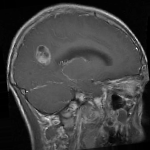

In [2]:
# Working on OpenCV
test_img_bgr = cv2.imread('Test1.png', cv2.IMREAD_COLOR)
test_img_rgb = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

Image(filename='Test1.png')

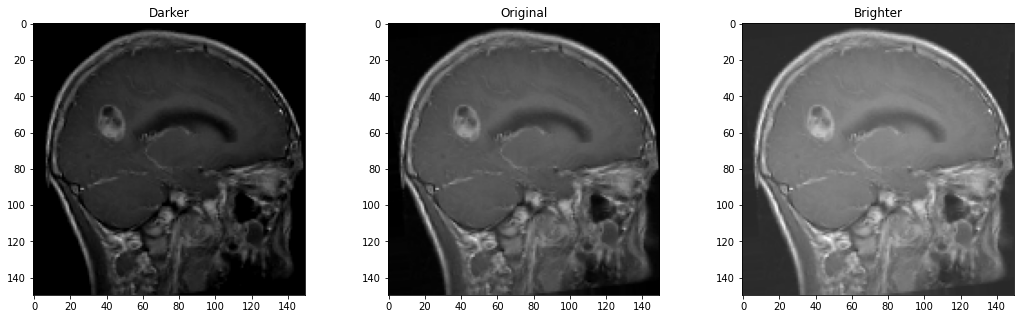

In [3]:
# To be brighter or not to be? It seems good!
matrix = np.ones(test_img_rgb.shape, dtype = "uint8") * 40 

brighter = cv2.add(test_img_rgb, matrix)
darker = cv2.subtract(test_img_rgb, matrix)

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(darker);
plt.title("Darker");
plt.subplot(132); plt.imshow(test_img_rgb);
plt.title("Original");
plt.subplot(133); plt.imshow(brighter);
plt.title("Brighter");

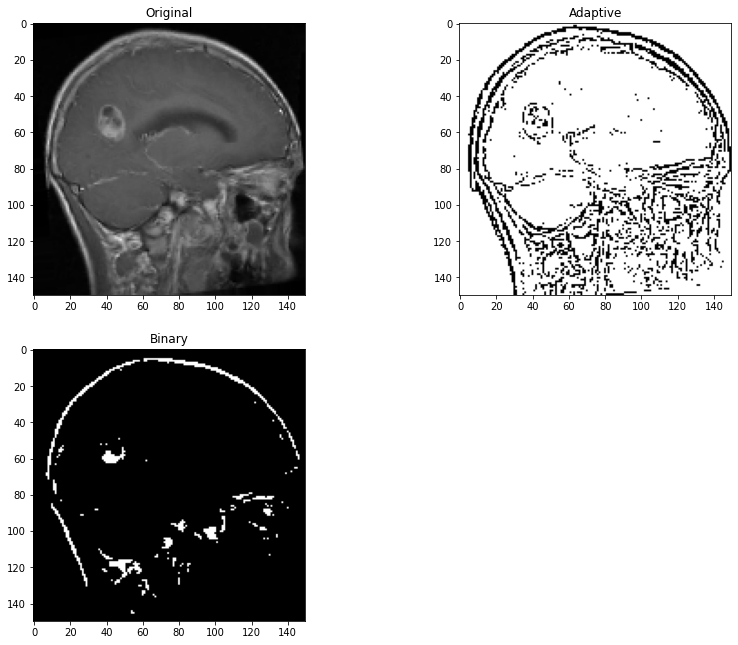

In [4]:
# Thresholding?!? apperently not!
img_read = cv2.imread("Test1.png", cv2.IMREAD_GRAYSCALE)

# Binary 
retval, img_thresh_gbl = cv2.threshold(img_read,130, 255, cv2.THRESH_BINARY)
# Adaptive
img_adaptive_thresh = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)

# Show the images
plt.figure(figsize=[14,11])
plt.subplot(221); plt.imshow(img_read, cmap="gray");         
plt.title("Original");
plt.subplot(222); plt.imshow(img_adaptive_thresh, cmap="gray");       
plt.title("Adaptive");
plt.subplot(223); plt.imshow(img_thresh_gbl, cmap="gray");       
plt.title("Binary");

# Contour Detection

Lets detect contours first then detect tumors

In [5]:
img_gray = cv2.imread('Test2.png', cv2.IMREAD_GRAYSCALE)

In [6]:
rbg_img = cv2.imread('Test2.png')

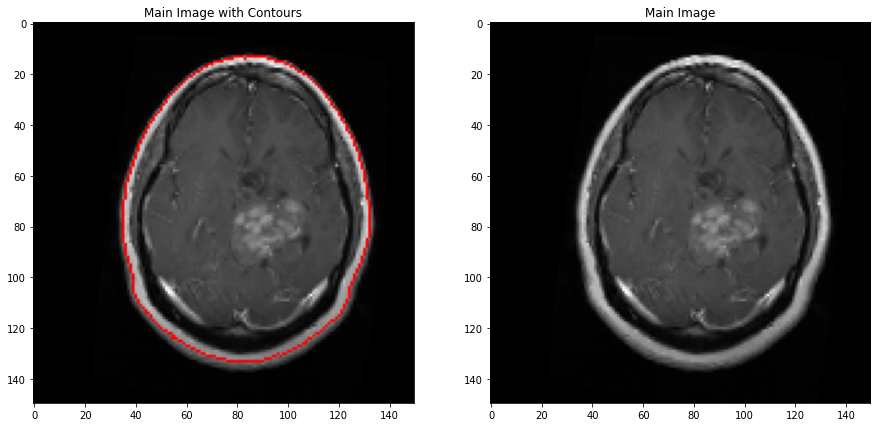

In [15]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 115, 255, cv2.THRESH_BINARY)
# now find the contours
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
img_thresh_gbl_copy = img_gray.copy()
cv2.drawContours(image=rbg_img, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1)

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(rbg_img, cmap='gray');         
plt.title("Main Image with Contours");
plt.subplot(122); plt.imshow(img_thresh_gbl_copy, cmap='gray');       
plt.title("Main Image");

In [8]:
contours

(array([[[ 79,  13]],
 
        [[ 78,  14]],
 
        [[ 77,  14]],
 
        [[ 76,  14]],
 
        [[ 75,  14]],
 
        [[ 74,  15]],
 
        [[ 73,  15]],
 
        [[ 72,  15]],
 
        [[ 71,  15]],
 
        [[ 70,  16]],
 
        [[ 69,  16]],
 
        [[ 68,  17]],
 
        [[ 67,  17]],
 
        [[ 66,  18]],
 
        [[ 65,  19]],
 
        [[ 64,  19]],
 
        [[ 63,  20]],
 
        [[ 62,  21]],
 
        [[ 61,  21]],
 
        [[ 60,  22]],
 
        [[ 59,  23]],
 
        [[ 58,  24]],
 
        [[ 57,  25]],
 
        [[ 56,  26]],
 
        [[ 55,  27]],
 
        [[ 54,  28]],
 
        [[ 53,  29]],
 
        [[ 52,  30]],
 
        [[ 52,  31]],
 
        [[ 51,  32]],
 
        [[ 50,  33]],
 
        [[ 50,  34]],
 
        [[ 49,  35]],
 
        [[ 48,  36]],
 
        [[ 47,  37]],
 
        [[ 47,  38]],
 
        [[ 46,  39]],
 
        [[ 45,  40]],
 
        [[ 45,  41]],
 
        [[ 44,  42]],
 
        [[ 44,  43]],
 
        [[ 43,  

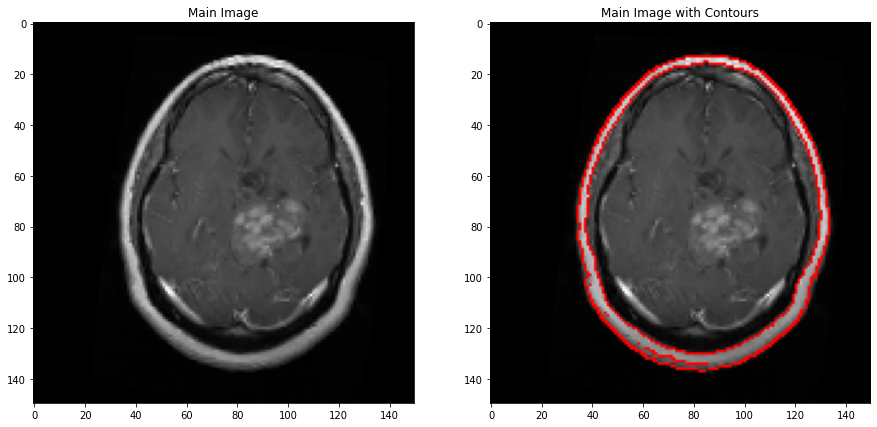

In [13]:
""" Let's load our picture """
image = cv2.imread('Test2.png')
image_ = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 140, 200)
  
""" Finding Contours
    Use a copy of the image
    since findContours alters the image """ 

contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
""" Draw all contours """
cv2.drawContours(image, contours, -1, (255, 0, 0), 1)
  

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(image_, cmap='gray');         
plt.title("Main Image");
plt.subplot(122); plt.imshow(image, cmap='gray');       
plt.title("Main Image with Contours");

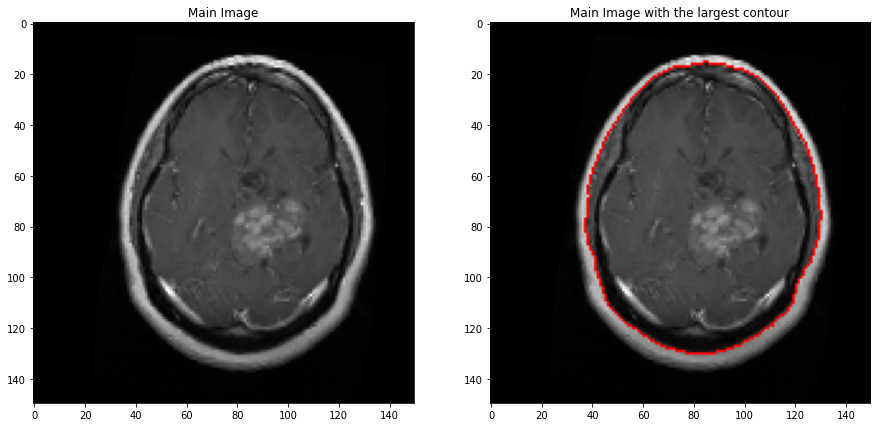

In [17]:
""" Let's load our picture """
image = cv2.imread('Test2.png')
image_ = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 140, 200)
  
""" Finding Contours
    Use a copy of the image
    since findContours alters the image """ 

""" First i need to grab the largest contour area and then draw it on the image """
items = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnts = items[0] if len(items) == 2 else items[1]
cnts = max(cnts, key=cv2.contourArea)
  
""" Draw all contours """
cv2.drawContours(image, cnts, -1, (255, 0, 0), 1)
  

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(image_, cmap='gray');         
plt.title("Main Image");
plt.subplot(122); plt.imshow(image, cmap='gray');       
plt.title("Main Image with the largest contour");

In [10]:
# """First i need to grab the largest contour area and then draw it on the image"""
# items = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cnts = items[0] if len(items) == 2 else items[1]
# cnts = max(cnts, key=cv2.contourArea)
# cnts

array([[[ 84,  15]],

       [[ 83,  16]],

       [[ 82,  16]],

       [[ 81,  16]],

       [[ 80,  16]],

       [[ 79,  16]],

       [[ 78,  17]],

       [[ 77,  17]],

       [[ 76,  17]],

       [[ 75,  17]],

       [[ 74,  17]],

       [[ 73,  17]],

       [[ 72,  17]],

       [[ 71,  18]],

       [[ 70,  18]],

       [[ 69,  19]],

       [[ 68,  19]],

       [[ 67,  20]],

       [[ 66,  20]],

       [[ 65,  21]],

       [[ 64,  21]],

       [[ 63,  22]],

       [[ 62,  23]],

       [[ 61,  24]],

       [[ 60,  25]],

       [[ 59,  26]],

       [[ 58,  27]],

       [[ 57,  28]],

       [[ 56,  29]],

       [[ 55,  30]],

       [[ 55,  31]],

       [[ 54,  32]],

       [[ 53,  33]],

       [[ 52,  34]],

       [[ 52,  35]],

       [[ 51,  36]],

       [[ 50,  37]],

       [[ 50,  38]],

       [[ 49,  39]],

       [[ 48,  40]],

       [[ 48,  41]],

       [[ 47,  42]],

       [[ 46,  43]],

       [[ 46,  44]],

       [[ 45,  45]],

       [[ 

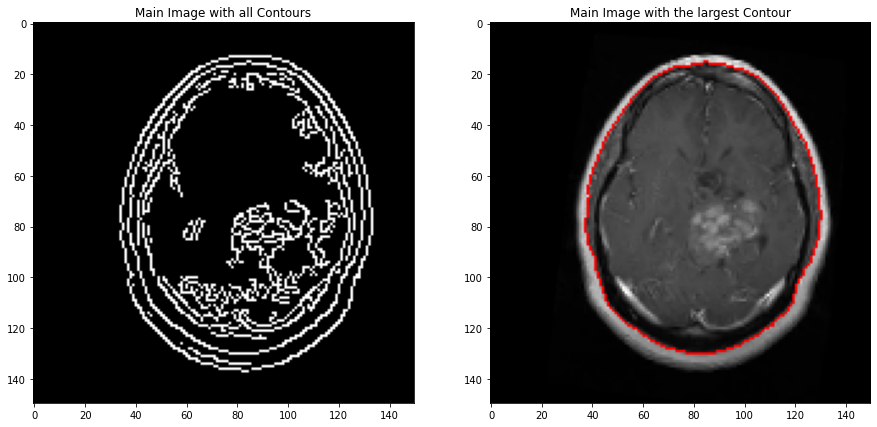

In [18]:
image = cv2.imread('Test2.png')

image_ = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 140, 200)
  
""" Draw all contours """
cv2.drawContours(image, cnts, -1, (255, 0, 0), 1)


plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(edged, cmap='gray');         
plt.title("Main Image with all Contours");
plt.subplot(122); plt.imshow(image, cmap='gray');       
plt.title("Main Image with the largest Contour");